<a href="https://colab.research.google.com/github/mikeninerbravog/POC_ML_LinearRegression/blob/master/POC_ML_LinearRegression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PoC (Proof of Concept) prático** de **Regressão Linear** usando **Python, Pandas, NumPy e Scikit-Learn**. O código treina um modelo para prever a eficiência de combustível de um carro com base no seu peso.

Interceptação (b): 12.93
Peso do Carro (w1): -1.59
Erro Médio Absoluto (MAE): 0.25
Erro Quadrático Médio (MSE): 0.12
R² Score: 0.95


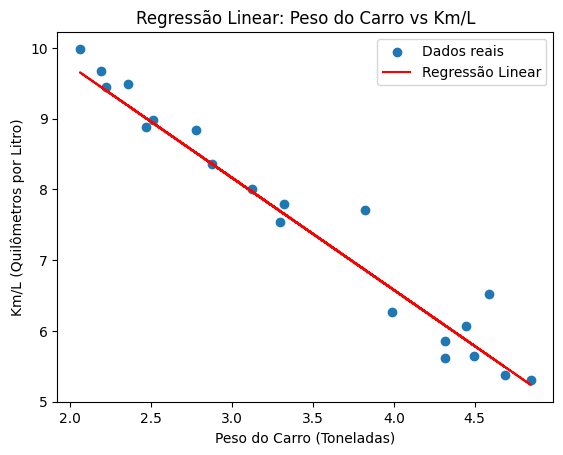

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Conversão de Milhas por Galão (MPG) para Km por Litro (Km/L)
def mpg_to_kmpl(mpg):
    return mpg * 0.425144

def kmpl_to_mpg(kmpl):
    return kmpl / 0.425144

# Gerando um conjunto de dados simulado
np.random.seed(42)
peso_carro = np.random.uniform(2.0, 5.0, 100)  # Peso do carro em toneladas
mpg_real = 30 - 3.6 * peso_carro + np.random.normal(0, 1, 100)  # Milhas por Galão (com ruído)
kmpl_real = mpg_to_kmpl(mpg_real)  # Convertendo para Km por Litro

# Criando um DataFrame
df = pd.DataFrame({'Peso do Carro (Toneladas)': peso_carro, 'Km/L Real': kmpl_real})

# Separando os dados em treino e teste
X = df[['Peso do Carro (Toneladas)']]
y = df['Km/L Real']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test)

# Avaliando o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = modelo.score(X_test, y_test)

# Exibindo os coeficientes
print(f"Interceptação (b): {modelo.intercept_:.2f}")
print(f"Peso do Carro (w1): {modelo.coef_[0]:.2f}")
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualizando os resultados
plt.scatter(X_test, y_test, label='Dados reais')
plt.plot(X_test, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Peso do Carro (Toneladas)')
plt.ylabel('Km/L (Quilômetros por Litro)')
plt.title('Regressão Linear: Peso do Carro vs Km/L')
plt.legend()
plt.show()


Os resultados indicam o desempenho do modelo de **Regressão Linear** na previsão da eficiência de combustível (Km/L) com base no peso do carro (toneladas). Vamos analisar cada métrica:

---

### **1. Equação do Modelo**
A regressão linear segue a fórmula:

```
Km/L previsto = b + w1 * Peso do Carro
```

Onde:
- `b = 12.93` → Interceptação (quando o peso do carro é 0 toneladas)
- `w1 = -1.59` → Inclinação da reta (coeficiente de regressão)
- `Peso do Carro` = Entrada em toneladas

Ou seja, a equação do modelo é:

```
Km/L = 12.93 - 1.59 * Peso do Carro
```

Isso significa que:
- Quando o peso do carro é **0 toneladas**, o consumo previsto seria **12.93 Km/L**.
- Para cada **1 tonelada a mais**, o carro perde **1.59 Km/L** na eficiência de combustível.

---

### **2. Avaliação do Modelo**
#### **Erro Médio Absoluto (MAE) = 0.25**
- Indica que, em média, as previsões do modelo diferem **0.25 Km/L** dos valores reais.
- Quanto menor o MAE, melhor a precisão do modelo.

#### **Erro Quadrático Médio (MSE) = 0.12**
- Mede o erro ao quadrado para penalizar erros maiores.
- Um valor **baixo (0.12)** sugere que as previsões do modelo são bastante precisas.

#### **R2 Score = 0.95**
- Mede o quão bem o modelo explica os dados.
- **0.95** significa que **95% da variação na eficiência de combustível pode ser explicada pelo peso do carro**.
- Como o valor está próximo de **1**, o modelo é altamente preciso.

---

### **Conclusão**
- O modelo **funciona bem** para prever a eficiência de combustível com base no peso do carro.
- O **R2 alto (0.95)** indica que o modelo se ajusta bem aos dados.
- Os **erros baixos (MAE = 0.25 e MSE = 0.12)** mostram que as previsões são precisas.
- O coeficiente negativo **(-1.59)** confirma que carros **mais pesados consomem mais combustível**.